In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

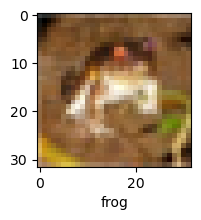

In [10]:
plot_sample(X_train, y_train, 0)

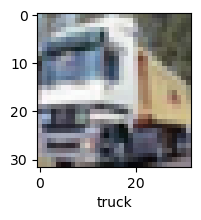

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train/255
X_test = X_test/255

<b>Build simple artificial neural network for image classification</b>

In [13]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = "relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

ANN.compile(optimizer = "SGD", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.3016 - loss: 1.9354
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4217 - loss: 1.6446
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4539 - loss: 1.5500
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4772 - loss: 1.4859
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4963 - loss: 1.4323


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report:- \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification report:- 
               precision    recall  f1-score   support

           0       0.74      0.30      0.43      1000
           1       0.68      0.49      0.57      1000
           2       0.34      0.36      0.35      1000
           3       0.31      0.46      0.37      1000
           4       0.37      0.47      0.42      1000
           5       0.43      0.31      0.36      1000
           6       0.50      0.58      0.54      1000
           7       0.59      0.47      0.53      1000
           8       0.64      0.59      0.61      1000
           9       0.46      0.69      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



<b>Now let us build a convolutional neural network to train our images.</b>

In [17]:
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3806 - loss: 1.7057
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5958 - loss: 1.1536
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6495 - loss: 1.0040
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6811 - loss: 0.9114
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7068 - loss: 0.8469
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7321 - loss: 0.7787
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7445 - loss: 0.7308
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7585 - loss: 0.6901
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7746 - loss: 0.6491
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7876 - loss: 0.6080


In [19]:
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6996 - loss: 0.9298


[0.9389463663101196, 0.6937000155448914]

In [20]:
y_pred = CNN.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[5.1861424e-03, 1.5656498e-05, 2.2657700e-02, 8.6368018e-01,
        5.1989849e-04, 5.8796849e-02, 2.9377110e-02, 1.6064048e-05,
        1.9739071e-02, 1.1302857e-05],
       [4.3652402e-05, 3.0757342e-02, 6.5234201e-07, 9.7756207e-08,
        1.8276619e-10, 1.8818453e-09, 2.1223615e-11, 1.7435914e-10,
        9.6904278e-01, 1.5544191e-04],
       [7.4728187e-03, 1.4347583e-01, 7.1009046e-05, 8.0818089e-04,
        2.7594640e-05, 3.2395365e-05, 1.1374412e-05, 2.2189859e-05,
        8.4662801e-01, 1.4506220e-03],
       [7.4614286e-01, 5.0804378e-03, 4.4639264e-03, 1.0876651e-02,
        9.2939154e-04, 1.2588945e-04, 3.9794412e-04, 2.5730094e-05,
        2.3194231e-01, 1.4852916e-05],
       [2.9770621e-07, 1.6337840e-06, 5.3997757e-03, 4.1813333e-02,
        3.7443768e-02, 1.9035960e-03, 9.1340816e-01, 2.9454732e-06,
        2.6444066e-05, 4.1577824e-08]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)